In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 18.5, 'Date')

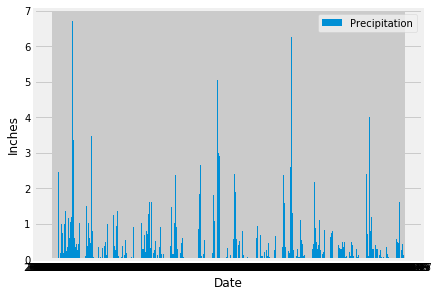

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel = [Measurement.date, Measurement.prcp]
prcp_dates = session.query(*sel)
prcp_dates_df = pd.DataFrame(prcp_dates)

# Calculate the date 1 year ago from the last data point in the database
prcp_dates_df["date"] = pd.to_datetime(prcp_dates_df["date"])
last_date = prcp_dates_df['date'].max()

from datetime import timedelta
start_date = (last_date - timedelta(days=365)).to_pydatetime()

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(*sel).filter(Measurement.date >= start_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation)

# Sort the dataframe by date
prcp_df.sort_values(by = "date", ascending = False)

# Use Pandas Plotting with Matplotlib to plot the data
graph_data = plt.bar(prcp_df["date"], prcp_df["prcp"], label = "Precipitation")
plt.tight_layout()
plt.legend(loc = "upper right")
plt.ylabel("Inches")
plt.xlabel("Date")


![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?
sel_station_count = [Measurement.station]
station_count = session.query(*sel_station_count).group_by(Measurement.station).count()
print(f"The dataset contains {station_count} available stations.")


The dataset contains 9 available stations.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(*sel_station_count)
station_df = pd.DataFrame(station_activity)
station_df = station_df.groupby(["station"]).size().reset_index(name='count').sort_values(by="count", ascending = False)
station_df.head(9)


,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_name = station_df["station"][0]
sel_most_active = [Measurement.station, Measurement.tobs]
most_active_data = session.query(*sel_most_active).filter(Measurement.station == most_active_name)

most_active_df = pd.DataFrame(most_active_data)
max_temp = most_active_df["tobs"].max()
min_temp = most_active_df["tobs"].min()
mean_temp = round(most_active_df["tobs"].mean(),1)

print(f"The most active station recorded a maximum temperature of {max_temp} F, a minimum temperature of {min_temp} F and an average temperature of {mean_temp} F.")

The most active station recorded a maximum temperature of 87.0 F, a minimum temperature of 53.0 F and an average temperature of 71.6 F.


(array([  7.,   9.,  12.,  14.,  40.,  30.,  37.,  62., 125.,  22.,   1.,
          1.]),
 array([60.  , 62.25, 64.5 , 66.75, 69.  , 71.25, 73.5 , 75.75, 78.  ,
        80.25, 82.5 , 84.75, 87.  ]),
 <a list of 12 Patch objects>)

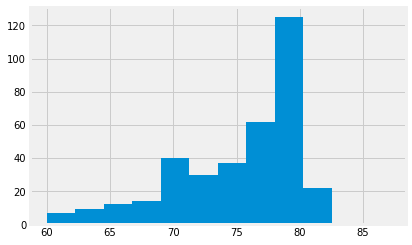

In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel_hist = [Measurement.station, Measurement.tobs, Measurement.date]

most_active_temp = session.query(*sel_hist).filter(Measurement.date >= start_date)

temp_histogram_df = pd.DataFrame(most_active_temp)
most_temp_measurements = temp_histogram_df.groupby("station").count().sort_values("tobs", ascending = False).reset_index("station")["station"][0]

temp_histogram_df = temp_histogram_df.loc[temp_histogram_df["station"] == most_temp_measurements]


plt.hist(temp_histogram_df["tobs"], bins=12, label="Temperature (Fahrenheit)")


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
